# To Explore Unsupervised Machine Learning

Unsupervised learning is a method in which machine trained on unlabeled daatwithour any guidance and the algorithm just tries to find patterns in the data. 
`Unlabeled data(i/p) ==> Explore patterns & Trends ==> O/p`

There are a few different types of clustering you can utilize:-

`K-Means Clustering –` clustering your data points into a number (K) of mutually exclusive clusters. A lot of the complexity surrounds how to pick the right number for K.

`Hierarchical Clustering –` clustering your data points into parent and child clusters. You might split your customers between younger and older ages, and then split each of those groups into their own individual clusters as well.

`Probabilistic Clustering –` clustering your data points into clusters on a probabilistic scale.

## Task : - From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

In [1]:
# Importing libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns 
from sklearn import datasets

In [2]:
# Load dataset
iris = datasets.load_iris()

In [3]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


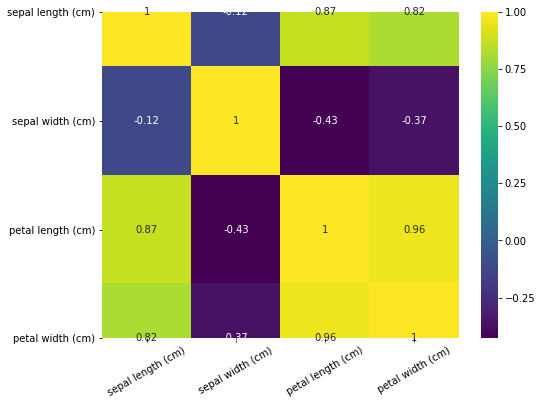

In [4]:
# Plot heatmap to find Correlation between them.
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot = True,cmap='viridis')
plt.xticks(Rotation = 30)
plt.yticks(rotation ='horizontal')
plt.show()

### How do you find the optimum number of clusters for K Means? How does one determine the value of K?
The "ELBOW METHOD" is one of the most popular methods to determine the optimal value of K.

In [5]:
#import required function.
from sklearn.cluster import KMeans

In [6]:
# Now, we will find Optimum No. of Cluster
wcss = []    # WCSS : Within cluster sum of squares

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

In [7]:
wcss

[681.3706,
 152.34795176035792,
 78.85144142614601,
 57.228473214285714,
 46.472230158730156,
 39.03998724608725,
 34.299712121212124,
 30.063110617452725,
 28.27172172856384,
 26.094324740540415]

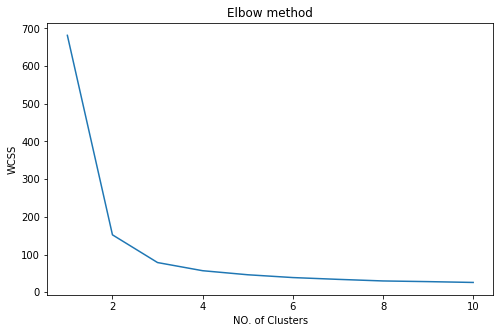

In [8]:
# Plotting the results onto a line graph and observe 'The elbow' shape. 
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss)
plt.title('Elbow method')
plt.xlabel('NO. of Clusters')
plt.ylabel('WCSS')
plt.show()

### We choose the optimum No.of cluster 3

# Creating the Cluster

In [9]:
# Applying kmeans to the dataset and creating the model..

kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 500, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(df)

In [10]:
## Cluster centroids and lables..

print(kmeans.cluster_centers_)
print('\n')
print(kmeans.labels_)

[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


# Cluster Visualization

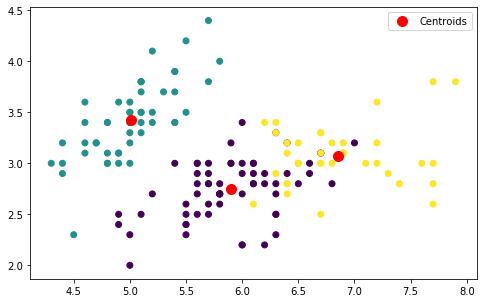

In [11]:
# visualizing the clusters based on first two columns of the dataset

plt.figure(figsize=(8,5))

plt.scatter(df['sepal length (cm)'], 
            df['sepal width (cm)'], 
            c=kmeans.labels_)

# Plotting the centroids of the clusters

plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:,1], 
            s = 100, c = 'red', label = 'Centroids')
plt.legend()

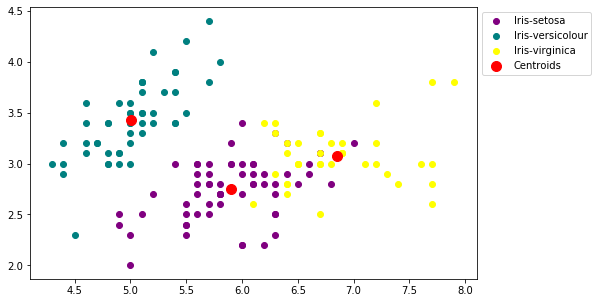

In [12]:
## Visualizig clusters based on each target classes..

plt.figure(figsize=(8,5))

plt.scatter(df[y_kmeans == 0]['sepal length (cm)'], 
            df[y_kmeans == 0]['sepal width (cm)'], 
            c = 'purple', label = 'Iris-setosa')

plt.scatter(df[y_kmeans == 1]['sepal length (cm)'], 
            df[y_kmeans == 1]['sepal width (cm)'], 
            c = 'teal', label = 'Iris-versicolour')

plt.scatter(df[y_kmeans == 2]['sepal length (cm)'], 
            df[y_kmeans == 2]['sepal width (cm)'],
         c = 'yellow', label = 'Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:,1], 
            s = 100, c = 'red', label = 'Centroids')

plt.legend(bbox_to_anchor=(1,1),loc=2)